# Orbital Mechanics in General Relativity 

### The equation of motion in classical relativity

This notebook studies a body rotating around a central mass M in polar coordinates. 
In the classical solution the force is given by $ \vec F = -\frac{GMm}{r^2} \hat r $ and the potential energy is $ U = -\frac{GMm}{r} $. 
This gives as a Lagrangian $$ \mathcal{L}=\frac{1}{2}m(\dot r^2 + r^2 \dot \theta^2)+\frac{GMm}{r} $$ and equation of motion  given by $ (\frac {d}{dt} \frac{\partial}{\partial \dot q}- \frac{\partial}{\partial q}) \mathcal L = 0 $ 
$$ \begin{equation} 
  \begin{cases} 
    \ddot r - r \dot \theta^2 = -\frac{GM}{r^2} \\
    \frac{d}{dt}r^2 \dot \theta = 0 \implies r^2 \dot \theta = l 
  \end{cases} 
\end{equation} $$ 
The specific angular momentum $ l $ is an integral of motion. This gives the ODEs
$$ \begin{equation} 
  \begin{cases} 
    \ddot r = -\frac{GM}{r^2} + \frac{l}{r^3} \\
    \dot \theta = \frac{l}{r^2} \\
  \end{cases} 
\end{equation} $$


In [168]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp


In [169]:
G = 1
c = 1
M = 1


def f_classic(t,y, GM, l):  #Classic ODE
  r, dtheta, dr = y[0], y[1], y[2]
  return np.array([dr,l*r**-2.0, -GM*r**-2.0 +l**2*r**-3.0])

def position_pol(x):  #Polar position
  return np.array([np.linalg.norm(x), np.arctan2(x[1],x[0])])

def velocity_pol(x,v):  #Polar velocity
  radial_versor = x/(np.linalg.norm(x))
  radial_velocity = np.dot(radial_versor,v)
  return np.array([radial_velocity, np.linalg.norm(v-radial_velocity)/np.linalg.norm(x)])

def angular_momentum(x,v):
  return x[0]*v[1]-x[1]*v[0]

def solve_orbits(x0, v0, GM,l):
  l = angular_momentum(x0,v0)
  r0 = position_pol(x0)
  vr0 = velocity_pol(x0,v0)
  sol = solve_ivp(f_classic, y0=(r0[0], r0[1], vr0[0]), t_span=(0,500), t_eval=np.linspace(0,500,1000), args=(GM, l), rtol= 1e-9)
  return np.array([sol.y[0], sol.y[1]])

orbits = []
for p in np.linspace(5,25,10):
  orbits.append(solve_orbits(np.array([p,0]), np.array([0,0.3]), G*M, l))



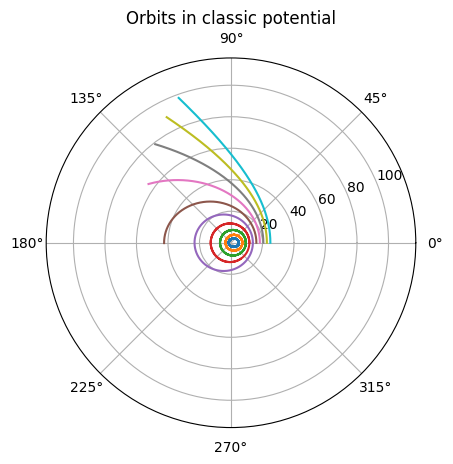

In [170]:
fig = plt.figure('Classic orbit')
ax = plt.subplot(projection = 'polar')
ax.set_title('Orbits in classic potential')
max_r = max([orbit[0].max() for orbit in orbits])
ax.set_ylim([0,1.2*max_r])
for orbit in orbits:
  ax.plot(orbit[1], orbit[0]) 
plt.show()





### Schwarzschild metric
 
In General Relativity, the coordinate time ($ t $) is no more invariant, so all the equations are described using the invariant proper time $ \tau $, of which the coordinate time is a function. Also there gravity is not a force and the mass moves along a geodesic trajectory in a space time curved by the central mass. 
The spacetime is described by the Schwarzschild metric $$ ds^2 = ds^\mu g_{\mu \nu} ds^\nu = -(1-\frac{2GM}{c^2 r})c^2 dt^2 +(1-\frac{2GM}{c^2 r})^{-1} dr^2 + r^2 d\theta^2 $$. 
The equations of geodetic motion are derived from the 4-velocity $ u = (\frac{dt}{d \tau},\frac{dr}{d \tau}, \frac{d \theta}{d \tau}) $ and the Christoffel symbols $ \Gamma^{\alpha}_{\mu \nu} = \frac{1}{2}g^{\alpha \lambda}(g_{\lambda \nu, \mu}+ g_{\lambda \mu, \nu} - g_{\mu \nu, \lambda}) $. 
$$ \begin{equation}
    \begin{cases}
      \frac{dx^\mu}{d \tau}= u^\mu\\
      \frac{du^\alpha}{d \tau} + \Gamma^\alpha_{\beta \gamma}u^\beta u^\gamma = 0
    \end{cases}\
\end{equation} $$ 
Using $ r_S $ = \frac{GM}{c^2}, in this metric the non-zero Christoffel symbols are $\Gamma^r_{tt}= \frac{c^2r_S(r-2r_S)}{r^3} $,   $\Gamma^t_{rt}= \frac{r_S}{r(r-2r_S)} $,   $ \Gamma^r_{rr}= -\frac{r_S}{r(r-2r_S)} $,    $ \Gamma^\theta_{\theta r}= \frac{1}{r} $,   $ \Gamma^r_{\theta \theta}= -(r-2r_S) $

Also, in this metric there are two integrals of motion, given by $ \xi \cdot u $, with $ \xi = (1,0,0) $ and $ (0,0,1) $ (because the metric only depends on $r$). This gives the two integrals $$ \begin{equation}
    \begin{cases}
      \frac{dt}{d \tau}(1-\frac{2GM}{r})= e \implies \frac{dt}{d \tau} = \frac{e}{1-2r_S} \\
      \frac{d\theta}{d \tau}r^2 = l \implies \frac{d\theta}{d \tau} = \frac{l}{r^2}
    \end{cases}\
\end{equation} $$ 

### A different version of geodesic equations
Different bodies will have different proper times at the same coordinate time, so to compare them the equations are rewritten to be integrated in $t$ by using $ \frac{d}{d\tau}= \frac{dt}{d\tau}\frac{d}{dt} $. The 4-velocity now has the form $u = \frac{dt}{d\tau}(1,\frac{dr}{dt}, \frac{d\theta}{dt}) = u^0 \hat u  $ and the geodesic equation becomes $ u^0 \frac{du^\alpha}{dt}+\Gamma^\alpha_{\beta \gamma}u^\beta u^\gamma=0 \implies   u^0 \dot u^0 \hat u^\alpha + (u^0)^2 \dot{ \hat u^\alpha} + (u^0)^2 \Gamma^\alpha_{\beta \gamma} \hat u^\beta \hat u^\gamma=0 \implies \frac{\dot u^0}{u^0} \hat{u}^\alpha + \dot{ \hat^\alpha u} + \Gamma^\alpha_{\beta \gamma} \hat u^\beta \hat u^\gamma= 0 $. 
  
Adding the integral of motions, this gives the equations $$ \begin{equation}
    \begin{cases}
      \dot \tau = \frac{1-\frac{2r_S}{r}}{e}\\
      \dot \theta = \frac{l}{e}\frac{r-2r_S}{r^3}\\
      \ddot r = \frac{2r_Sre^2}{(r-2r_S)^3} - \frac{c^2r_S(r-2r_S)}{r^3}+\frac{r_S}{r(r-2r_S)}(\dot r)^2+(r-2r_S)(\dot \theta)^2
    \end{cases}\
\end{equation} $$ 






